In [19]:
import itertools
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dependence.tests import func_sum
from dependence.tests.test_functions import func_cum_sum_weight
from dependence import ConservativeEstimate
from dependence import quantile_func
from dependence import iterative_vine_minimize
from dependence.dependence_plot import matrix_plot_results
from dependence.dependence_plot import plot_iterative_results


%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = 12
np.random.seed(random_state)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
dim = 7
margins = [ot.Normal()]*dim
alpha = 0.05
q_func = quantile_func(alpha)
families = np.tril(np.ones((dim, dim)), k=1)

In [21]:
n_influencial_pairs = 2
val_influencial = 1.
val_non_influencial = 0.0
corr_dim = dim * (dim-1)/2

all_pairs = np.asarray(list(itertools.combinations(range(dim), 2)))
selected_pairs = all_pairs[np.random.choice(range(corr_dim), size=n_influencial_pairs, replace=False)]

power = np.zeros((dim, dim))
for i in range(1, dim):
    for j in range(i):
        if [j, i] in selected_pairs.tolist():
            print [i, j]
            power[i, j] = val_influencial
        else:
            power[i, j] = val_non_influencial
test_func = lambda x: func_cum_sum_weight(x, power)
print(power)

[3, 1]
[5, 1]
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [22]:
n = 10000
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
indep_result = quant_estimate.independence(n_input_sample=n, q_func=q_func, random_state=random_state)[0]

In [23]:
algorithm_parameters = {
    "n_input_sample": n,
    "n_dep_param_init": 20,
    "max_n_pairs": 1,
    "grid_type": 'lhs',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 0,
    "adapt_vine_structure": False,
    "with_bootstrap": False,
    "verbose": False,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)


Iteration 1: selected pair: (3, 1)
Total number of evaluations = 4200000. Minimum quantity at -5.24.



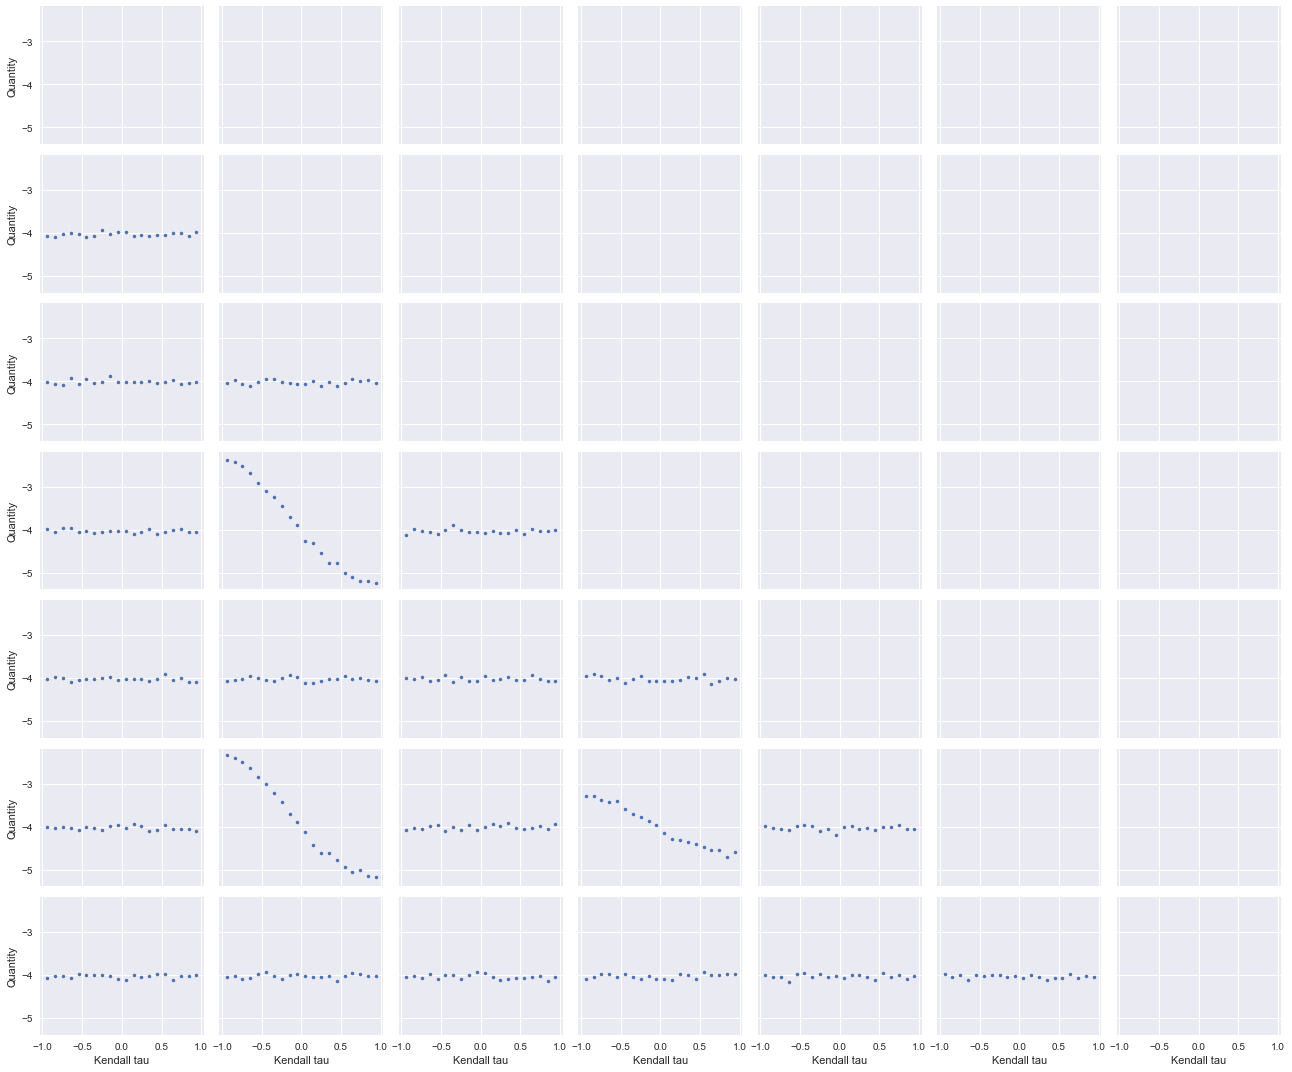

In [24]:
results = iterative_results[0]
matrix_plot_results(results, figsize=(18, 15))
plt.savefig('output/matrix_plot.png')

In [25]:
algorithm_parameters = {
    "n_input_sample": n,
    "n_dep_param_init": None,
    "max_n_pairs": 4,
    "grid_type": 'vertices',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 2,
    "adapt_vine_structure": False,
    "with_bootstrap": False,
    "verbose": True,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

n=10000. Worst quantile of [(1, 0)] at -4.12540523537
n=10000. Worst quantile of [(2, 0)] at -4.13436795162
n=10000. Worst quantile of [(2, 1)] at -4.03998469469
n=10000. Worst quantile of [(3, 0)] at -4.07988086426
n=10000. Worst quantile of [(3, 1)] at -5.22825283426
n=10000. Worst quantile of [(3, 2)] at -4.13951427924
n=10000. Worst quantile of [(4, 0)] at -4.04557353474
n=10000. Worst quantile of [(4, 1)] at -4.03843776123
n=10000. Worst quantile of [(4, 2)] at -4.01066122884
n=10000. Worst quantile of [(4, 3)] at -4.08695825027
n=10000. Worst quantile of [(5, 0)] at -4.12700988212
n=10000. Worst quantile of [(5, 1)] at -5.27777081683
n=10000. Worst quantile of [(5, 2)] at -4.02666994303
n=10000. Worst quantile of [(5, 3)] at -4.6575457396
n=10000. Worst quantile of [(5, 4)] at -4.12561215804
n=10000. Worst quantile of [(6, 0)] at -4.0354599878
n=10000. Worst quantile of [(6, 1)] at -4.08114801604
n=10000. Worst quantile of [(6, 2)] at -4.04251022467
n=10000. Worst quantile of [(6

In [26]:
K = 2000
grid_type = 'lhs'
grid_results_lhs = quant_estimate.gridsearch_minimize(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)
min_result = grid_results_lhs.min_result
min_result.quantity

-6.5936363172441546

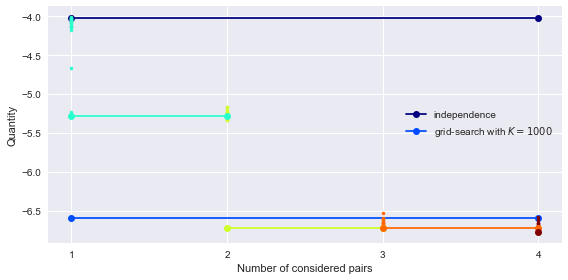

In [27]:
plot_iterative_results(iterative_results, indep_result=indep_result, grid_result=min_result, q_func=q_func)

In [28]:
K = 1000
grid_type = 'vertices'
grid_results_vertices = quant_estimate.gridsearch_minimize(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)
min_result_vertices = grid_results_vertices.min_result
min_result_vertices.quantity

-6.922809277770136